In [3]:
############# Librerías
using Random
using StatsBase
using Printf
using Plots
using StatsPlots
###########Funciones
rng = MersenneTwister(); #Variable global
function lanzarMonedas(totalMonedas)
    vMonedas = bitrand(rng, totalMonedas)
    return vMonedas
end;
###########
function simul(totalMonedas, totalLanzamientos, imprimir = Nothing);
    v1, vrand , vmin = Nothing ,Nothing , Nothing
    crand = StatsBase.sample(collect(1:1:totalMonedas))
    sumaCaras = zeros(Int64, totalMonedas)
    for lanza in collect(1:1:totalLanzamientos)
        sumaCaras = sumaCaras + lanzarMonedas(totalMonedas)
    end
    carasFrecuencia = sumaCaras/totalLanzamientos
    v1 = carasFrecuencia[1]
    vrand = carasFrecuencia[crand]
    cmin = argmin(carasFrecuencia)
    vmin = carasFrecuencia[cmin]
    if imprimir == "Y"
        @printf("Frecuencia de la primera moneda:  %.2f \n",v1);
        @printf("Frecuencia de la moneda aleatoria:  %.2f\n ",vrand);
        @printf("Minima frecuencia de la moneda:  %.2f\n ",vmin);
    else        
    end
    return v1, vrand , vmin
end;
###########

function hb(eps, n)
    return 2.0*exp.(-2.0*3*eps.^2)
end

hb (generic function with 1 method)

In [4]:
eps = collect(0:0.05:0.5)
return 2.0*exp.(-2.0*3*eps.^2)

11-element Vector{Float64}:
 2.0
 1.9702238792061253
 1.8835290671684974
 1.7474318233760688
 1.5732557221331067
 1.3745785575819445
 1.1654965047479793
 0.9590109179497883
 0.7657857719502239
 0.5934200285880905
 0.44626032029685964

# Ejercicios 
## Learning form data - a short course

## Exercise 1.2 
Suppose that we use a perceptron to detect spam messages. Let's say that each mail message is represented by the frequency of ocurrence of keywords, and the outputs is $+1$ if the message is considered spam.

- __a)__ Can you think of some keywords that will end up with a large positive weight in the perceptron?
    * Hay que aclarar que las palabras dependen del idioma base del usuario de correo. Considerando que en este caso puede ser __español__ se consideran palabras como: confirmar, disculpas, donar, fondos, riqueza, herencia, regalo, banco, viagra, promocion, gratis, felicitaciones.
- __b)__ How about keywords that will get a negative weight?
 * Palabras como Cordial, universidad, estudio, colaboracion, solicitud.

- __c)__ What parameter in the perceptron directly affects how many borderline messages end up being classified as spam?
 * El parámetro en el perceptrón que se ve afectado directamente es el umbral $b$ en  $sign((\sum_{i=1}^{d} w_{i}x_i)+b)$ ya que es el que caracteriza la _frontera_.

## Exercise 1.3 
The weight update rule in (1.3) has the nice interpretation that it moves in the direcion of classifying $\boldsymbol{x}(t)$ correctly.

- __a)__  Show that $y(t)\boldsymbol{w}^{T}(t)x(t)<0$
    * Supongamos que $x(t)$ está mal clasificado por $\boldsymbol{w}^{T}(t)$. Por lo tanto $\boldsymbol{w}^{T}(t)x(t)>0$ y $y(t)<0$ es asì que su porducto $y(t)\boldsymbol{w}^{T}(t)x(t)<0$. 
    * De manera análoga se tiene para  $\boldsymbol{w}^{T}(t)x(t)<0$ y $y(t)>0$. 
- __b)__ Show that $y(t)w^T(t+1)x(t) > y(t)w^T(t)x(t)$
    * Usando que $w^T(t+1) = w(t)+y(t)x(t)$ se tiene que $ y(t)w^T(t+1)x(t) = y(t) \left(w(t)+y(t)x(t)\right)^Tx(t)$ que aplicando las propiedades de la transpuestas equivale a $y(t)\left(w^T(t) + y(t)x^T(t)\right)x(t) = y(t)w^T(t)x(t) + y^2(t)x^T(t)x(t) \gt y(t)w^T(t)x(t)$.
- __c)__ As far as classifying  $x(t)$ ins concerned, argue that the move from $w(t)$ to $w(t+1)$ is a move 'in the right direction'.
    * Se tiene que $y(t)w^T(t)x(t)$ va incrementando ame dida que $t$ aumenta. Entonces, si el punto está clasificado errónemente $y(t)$ y $\boldsymbol{w}^{T}(t)x(t)$ van a tener signos disintos. Por lo que las variaciones de $\boldsymbol{w}^{T}(t)x(t)$ ajustan a la regiòn correpondiente ya sea aumentando o disminuyendo para localizar correctamente la función.

## Exercise 1.10
Here is an experiment that illustrates the diference between a single bin and multiple bins. Ruan a computer simulation for flipping 1000 fair coins. Flip each coin independently 10 times. Let's focues on 3 coins as follows:
- $c_1$ is the first coin flipped; $c_{rand}$ is a coin you choose at random; $c_{min}$ is the coin that had a the minimun frequecy of heads (pick the earlier one in case of a tie). Let $\nu_1$, $\nu_{rand}$ and $\nu_{min}$ be the fraction of heads you obtain for the respective three coins.

- __a)__  What is $\mu$ for the three coins selected?
 * El $\mu = 0.5$ por que se presume que las monedas no están cargadas. Recordemos que $\mu$ representa la probabilidad de _error_ fuera de la muestra. La cual, en general, es desconocida. A continuación se presentan las frecuencias para las monedas propuestas.

In [6]:
h = simul(1000, 10,"Y");

Frecuencia de la primera moneda:  0.50 
Frecuencia de la moneda aleatoria:  0.60
 Minima frecuencia de la moneda:  0.00
 

- __b)__  Repeat this entire experiment a large number of times(e.g., 100 000 runs of the entire experiment) to get several instances of $\nu_1$, $\nu_{rand}$ and $\nu_{min}$ and plot the histograms of the distributions of $\nu_1$, $\nu_{rand}$ and $\nu_{min}$. Notice that which coins endup being  $C_{rand}$ and $c_{min}$ may differ from one run to another.

In [59]:
totalMonedas = 1000
totalLanzamientos = 10
veces = 1000000
v1s, vrands, vmins = [],[],[];
for c in collect(1:1:veces)
    v1,vrand,vmin = simul(totalMonedas, totalLanzamientos)
    append!(v1s,v1)
    append!(vrands,vrand)
    append!(vmins,vmin)
end

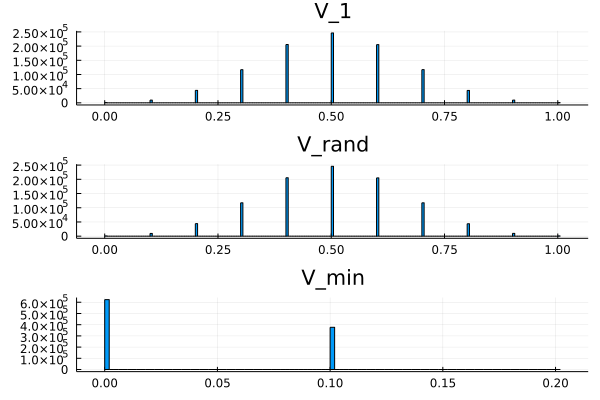

In [60]:
h1 = histogram(v1s, title="V_1",leg=false)
h2 = histogram(vrands, title="V_rand",leg=false)
h3 = histogram(vmins,title="V_min",leg=false)
plot(h1,h2,h3, layout = (3,1))

Los histogramas de $\nu_1$, $\nu_{rand}$ presentan similitud en su forma, y si bien la media de $\nu_{min}$ difiere, esta no cambia significativamente.

In [61]:
print("v1s: "*string(median(v1s))*"\n")
print("vrands: "*string(median(vrands))*"\n")
print("vmins "*string(median(vmins))*"\n")

v1s: 0.5
vrands: 0.5
vmins 0.0


- __c)__  Using __(b)__, plot estimates for $P[\mid(\nu - \mu)\mid> \epsilon]$ as function of $\epsilon$, together with the Hoeffding $ 2e^{-2\epsilon^{2}N}$ on the same graph.

In [64]:
eps = collect(0:0.05:0.5)
bounds = hb(eps, totalLanzamientos)
v1d = abs.(v1s.-0.5)
vrandd = abs.(vrands.-0.5)
vmind = abs.(vmins.-0.5)
l = length(eps)
p1, prand, pmin = zeros(l),zeros(l),zeros(l)
for g in collect(1:1:l)
    ep = eps[g]
    p1[g] = sum((v1d.>ep).*v1d)/veces
    prand[g] = sum((vrandd.>ep).*vrandd)/veces
    pmin[g] = sum((vmind.>ep).*vmind)/veces
end


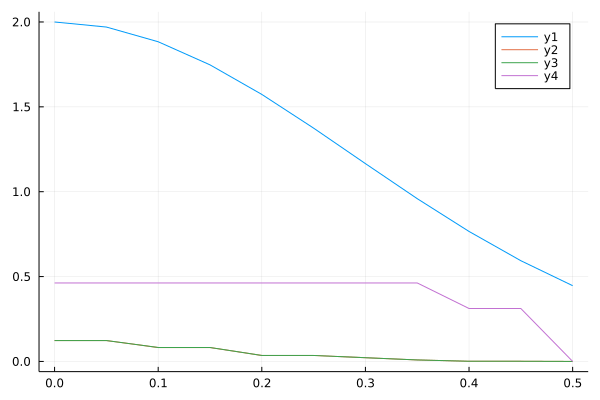

In [65]:
plot(eps,[bounds,p1,prand,pmin])


- __d)__  Which coins obey the Hoeffding bound, and which ones do not? Explain why
 * Los que respetan la cota de Hoeffding son $c_1$ y $c_{random}$. Mientras que las dos primeras monedas se fijarno antes de hacer el experimento, la $c_{min}$ va cambiando despues de cada experimento.

- __d)__  Relate part __(d)__, to de multiple bins in Figure 1.10.

Cada realizaciòn del experimento es un contenedor _bin_ por lo que cada experimento representa una hipotesis. Así las monedas que cumplen con las condiciones necesarias son las $c_1$ y $c_{random}$ elegidas con anterioridad.

## Exercise 1.11
We are a data set $\mathcal{D}$ of 25 trainin expmaples form an unknown target function $f: \mathcal{X} \rightarrow \mathcal{Y}$, where $\mathcal{X} = \mathbb{R}$ and $\mathcal{Y} =\{ -1 , +1 \}$. To learn  $f$, we use a simple hypothesis set $\mathcal{H} = \{ h_1 , h_2\}$ where $h_1$ is the constant $+1$ function and $h_2$ in the constan $-1$.
 

- __a)__  Can $S$ produce a hypothesis that is guaranteed to perform better than random on any poinçt outside $\mathcal{D}$ ?

 * S no puede garantizar un mejor rendimiento que un punto aleatorio fuera de $\mathcal{D}$. Sobre la muestra $\mathcal{D}$puede ajustarse a las hipòtesis $h_1$ sin embargo, puede que todos los otros puntos de $\mathcal{X}$ fuera de $\mathcal{D}$  no correpondan con la funciòn _aprendida_.
- __b)__  Assume for the rest of the esercise that all the examples in $\mathcal{D}$ have $y_n = +1$. Is it possible that the hypothesis that $\mathcal{C}$ produces turns out to be better than the hypothesus that $\mathcal{S}$ produces? 
 * Es posible que $\mathcal{C}$ produzca una mejor hipòtesis que $\mathcal{S}$. $\mathcal{C}$.
- __c)__  If $p =0.9$, what is the probability that $\mathcal{S}$ will produce a better hypothesis than $\mathcal{C}$?

 * Con es valor de $p$ se tiene que $\mathcal{S}$ caracterizarà el 90% de los elementos de $\mathcal{D}$ asì las cosas el rendimiento de $\mathcal{C}$ es tan solo del 10% por lo que $\mathcal{S}$ producira una mejor hipotesis que $\mathcal{C}$.
- __d)__  Is there any value of $p$ for which it is more likely than not that  $\mathcal{C}$ will produce a better hypothesis tha  $\mathcal{S}$.
  * Si el valor de $p$ es inferior 0.5 entonces se puede obtener un mejor rendimiento para  $\mathcal{C}$.
 
 

## Exercise 1.12
A firen comes to you with a learning problem. She says the target function $f$ is completely unknown, but she has 4000 ddata points. She is willing to pay you to solve her porblem and produce for her a $g$ which aproximates $f$. Waht is the best thath you can promise her among the following:

 * __C__ Por la cantidad de datos podemos en efecto decir que se puede construir una hipotesìs, segùn la ley de Hoeffding, sin embargo no se sabe absolutamente nada de la complejidad de la funciòn objetivo $f$ por lo que se puede estar fallando en ese aspecto.
 